In [1]:
import pandas as pd
df = pd.read_csv("c:/users/saini/Downloads/marksheet.csv")
df.head(4)

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33


In [7]:
df['Total'] = df['Science']+df['English']+df['History']+df['Maths']

In [9]:
df['Percentage'] = df['Total']/4

In [10]:
df.head(4)

,id,Name,Gender,Age,Section,Science,English,History,Maths,Total,Percentage
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75
2,3,Danya,Female,14,C,12,87,16,96,211,52.75
3,4,Denna,Female,14,B,15,53,82,33,183,45.75


In [11]:
def passFail(val):
    if(val>33):
        return "Pass"
    else:
        return "Fail"

In [12]:
df['Pass/Fail'] = df['Percentage'].map(passFail)

In [13]:
df.head(4)

,id,Name,Gender,Age,Section,Science,English,History,Maths,Total,Percentage,Pass/Fail
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25,Pass
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75,Fail
2,3,Danya,Female,14,C,12,87,16,96,211,52.75,Pass
3,4,Denna,Female,14,B,15,53,82,33,183,45.75,Pass


In [14]:
df = df.drop(columns=['id','Name','Gender','Age','Section'])

In [15]:
df.head(4)

,Science,English,History,Maths,Total,Percentage,Pass/Fail
0,21,81,62,49,213,53.25,Pass
1,29,41,17,40,127,31.75,Fail
2,12,87,16,96,211,52.75,Pass
3,15,53,82,33,183,45.75,Pass


In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
ode = OrdinalEncoder(categories=[['Fail','Pass']])

In [19]:
df['Pass/Fail']=ode.fit_transform(df[['Pass/Fail']])

In [21]:
df.head(3)

,Science,English,History,Maths,Total,Percentage,Pass/Fail
0,21,81,62,49,213,53.25,1.0
1,29,41,17,40,127,31.75,0.0
2,12,87,16,96,211,52.75,1.0


In [22]:
X = df.iloc[:,0:6]

In [23]:
y = df.iloc[:,6]

In [24]:
X.head(3)

,Science,English,History,Maths,Total,Percentage
0,21,81,62,49,213,53.25
1,29,41,17,40,127,31.75
2,12,87,16,96,211,52.75


In [25]:
y.head(3)

0    1.0
1    0.0
2    1.0
Name: Pass/Fail, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=17,test_size=0.2)

In [30]:
X_train.shape

(200, 6)

In [31]:
X_test.shape

(50, 6)

In [32]:
import matplotlib.pyplot as plt

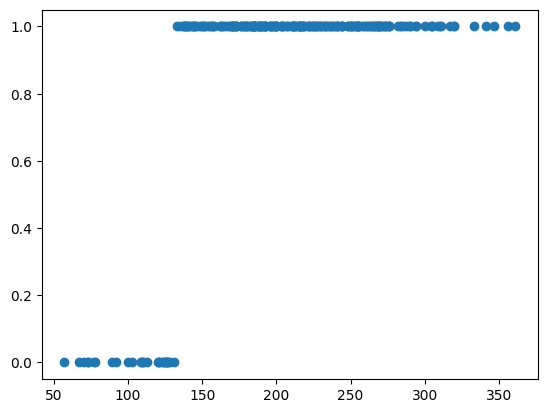

In [34]:
plt.scatter(df['Total'],df['Pass/Fail'])

In [35]:
import seaborn as sns

<Axes: xlabel='Pass/Fail', ylabel='count'>

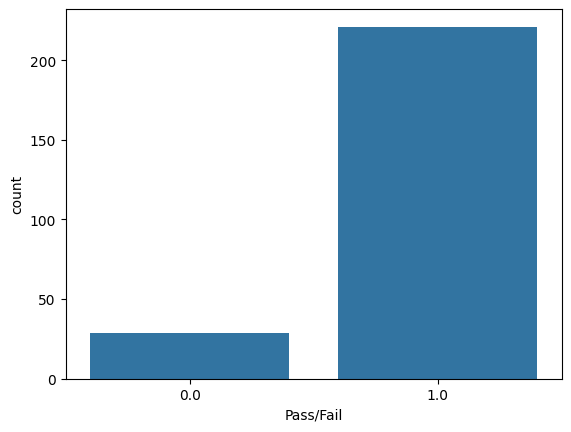

In [36]:
sns.countplot(x='Pass/Fail',data=df)

In [37]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
model.score(X_test,y_test)

1.0

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_pred,y_test)

In [47]:
cm

array([[ 4,  0],
       [ 0, 46]])

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb = GaussianNB()

In [58]:
gnb.fit(X_train,y_train)

GaussianNB()

In [59]:
gnb.score(X_test,y_test)

0.98

In [60]:
y_pred = gnb.predict(X_test)

In [62]:
cm = confusion_matrix(y_pred,y_test)

In [63]:
cm

array([[ 4,  1],
       [ 0, 45]])